In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import os

import warnings
warnings.filterwarnings("ignore")


In [2]:
os.getcwd()

'C:\\Users\\Lenovo'

In [3]:
os.chdir("C:/Users/Lenovo/Downloads/Module 6/Predictive Analytics")

In [4]:
df = pd.read_csv('germancredit.csv')

In [5]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns",25)

In [6]:
df.head(10)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


In [7]:
df.shape

(1000, 21)

In [8]:
df.dtypes

Default             int64
checkingstatus1    object
duration            int64
history            object
purpose            object
amount              int64
savings            object
employ             object
installment         int64
status             object
others             object
residence           int64
property           object
age                 int64
otherplans         object
housing            object
cards               int64
job                object
liable              int64
tele               object
foreign            object
dtype: object

In [9]:
#df['Default'] = pd.Categorical(df.Default)


In [10]:
## We will keep an untouched copy of our dataset in case we need it ahead.

dt = df.copy()

In [11]:
#To turn on scientific notions 
pd.options.display.float_format = '{:.5f}'.format
df.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000
mean,0.30000,20.90300,3271.25800,2.97300,2.84500,35.54600,1.40700,1.15500
std,0.45849,12.05881,2822.73688,1.11871,1.10372,11.37547,0.57765,0.36209
min,0.00000,4.00000,250.00000,1.00000,1.00000,19.00000,1.00000,1.00000
25%,0.00000,12.00000,1365.50000,2.00000,2.00000,27.00000,1.00000,1.00000
50%,0.00000,18.00000,2319.50000,3.00000,3.00000,33.00000,1.00000,1.00000
75%,1.00000,24.00000,3972.25000,4.00000,4.00000,42.00000,2.00000,1.00000
max,1.00000,72.00000,18424.00000,4.00000,4.00000,75.00000,4.00000,2.00000


In [12]:
#To turn off scientific notions 
pd.options.display.float_format = '{:.2f}'.format

In [13]:
#df.describe(include = 'category')

## Check Duplicate Rows

In [14]:
duplicate = df[df.duplicated()]
duplicate

## No duplicate rows

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign


<AxesSubplot:xlabel='Default'>

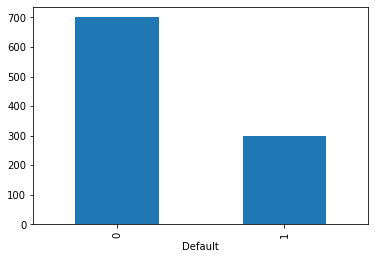

In [15]:
GroupedData=df.groupby('Default').size()
GroupedData.plot(kind='bar', figsize=(6,4))


# Correct DataTypes

## Change Default, Liable, Cards, Residance, Installment from Numeric to Object Type

In [16]:
df['Default'] = df['Default'].astype('object')
df['liable'] = df['liable'].astype('object')
df['cards'] = df['cards'].astype('object')
df['residence'] = df['residence'].astype('object')
df['installment'] = df['installment'].astype('object')


# Value Counts

## Checking value counts for each categorical variable

In [17]:
df['Default'].value_counts()/len(df['Default'])*100

0   70.00
1   30.00
Name: Default, dtype: float64

In [18]:
df['checkingstatus1'].value_counts()/len(df['checkingstatus1'])*100

# Status of existing checking account
# A11 : ... < 0 DM
# A12 : 0 <= ... < 200 DM
# A13 : ... >= 200 DM / salary assignments for at least 1 year
# A14 : no checking account

A14   39.40
A11   27.40
A12   26.90
A13    6.30
Name: checkingstatus1, dtype: float64

In [19]:
df['history'].value_counts()/len(df['history'])*100

# Credit history
# A30 : no credits taken/ all credits paid back duly
# A31 : all credits at this bank paid back duly
# A32 : existing credits paid back duly till now
# A33 : delay in paying off in the past
# A34 : critical account/ other credits existing (not at this bank)

A32   53.00
A34   29.30
A33    8.80
A31    4.90
A30    4.00
Name: history, dtype: float64

In [20]:
df['purpose'].value_counts()/len(df['purpose'])*100

# Purpose
# A40 : car (new)
# A41 : car (used)
# A42 : furniture/equipment
# A43 : radio/television
# A44 : domestic appliances
# A45 : repairs
# A46 : education
# A47 : (vacation - does not exist?)
# A48 : retraining
# A49 : business
# A410 : others

A43    28.00
A40    23.40
A42    18.10
A41    10.30
A49     9.70
A46     5.00
A45     2.20
A44     1.20
A410    1.20
A48     0.90
Name: purpose, dtype: float64

In [21]:
df['savings'].value_counts()/len(df['savings'])*100

# Savings account/bonds
# A61 : ... < 100 DM
# A62 : 100 <= ... < 500 DM
# A63 : 500 <= ... < 1000 DM
# A64 : .. >= 1000 DM
# A65 : unknown/ no savings account

A61   60.30
A65   18.30
A62   10.30
A63    6.30
A64    4.80
Name: savings, dtype: float64

In [22]:
df['employ'].value_counts()/len(df['employ'])*100

# Present employment since
# A71 : unemployed
# A72 : ... < 1 year
# A73 : 1 <= ... < 4 years
# A74 : 4 <= ... < 7 years
# A75 : .. >= 7 years

A73   33.90
A75   25.30
A74   17.40
A72   17.20
A71    6.20
Name: employ, dtype: float64

In [23]:
df['status'].value_counts()/len(df['status'])*100

# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single

A93   54.80
A92   31.00
A94    9.20
A91    5.00
Name: status, dtype: float64

In [24]:
df['others'].value_counts()/len(df['others'])*100

# Other debtors / guarantors
# A101 : none
# A102 : co-applicant
# A103 : guarantor

A101   90.70
A103    5.20
A102    4.10
Name: others, dtype: float64

In [25]:
df['property'].value_counts()/len(df['property'])*100

# A121 : real estate
# A122 : if not A121 : building society savings agreement/ life insurance
# A123 : if not A121/A122 : car or other, not in attribute 6
# A124 : unknown / no property

A123   33.20
A121   28.20
A122   23.20
A124   15.40
Name: property, dtype: float64

In [26]:
df['otherplans'].value_counts()/len(df['otherplans'])*100

# Other installment plans
# A141 : bank
# A142 : stores
# A143 : none

A143   81.40
A141   13.90
A142    4.70
Name: otherplans, dtype: float64

In [27]:
df['housing'].value_counts()/len(df['housing'])*100

# A151 : rent
# A152 : own
# A153 : for free

A152   71.30
A151   17.90
A153   10.80
Name: housing, dtype: float64

In [28]:
df['job'].value_counts()/len(df['job'])*100

# A171 : unemployed/ unskilled - non-resident
# A172 : unskilled - resident
# A173 : skilled employee / official
# A174 : management/ self-employed/highly qualified employee/ officer

A173   63.00
A172   20.00
A174   14.80
A171    2.20
Name: job, dtype: float64

In [29]:
df['tele'].value_counts()/len(df['tele'])*100
# Telephone
# A191 : none
# A192 : yes, registered under the customers name

A191   59.60
A192   40.40
Name: tele, dtype: float64

In [30]:
df['foreign'].value_counts()/len(df['foreign'])*100
# foreign worker
# A201 : yes
# A202 : no

A201   96.30
A202    3.70
Name: foreign, dtype: float64

In [31]:
df['liable'].value_counts()/len(df['liable'])*100

#Number of people being liable to provide maintenance for

1   84.50
2   15.50
Name: liable, dtype: float64

## Handiling Outleiers

In [32]:
## Count number of outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Default             0
age                23
amount             72
cards               0
checkingstatus1     0
duration           70
employ              0
foreign             0
history             0
housing             0
installment         0
job                 0
liable              0
otherplans          0
others              0
property            0
purpose             0
residence           0
savings             0
status              0
tele                0
dtype: int64

### liable is not outliers 

<AxesSubplot:>

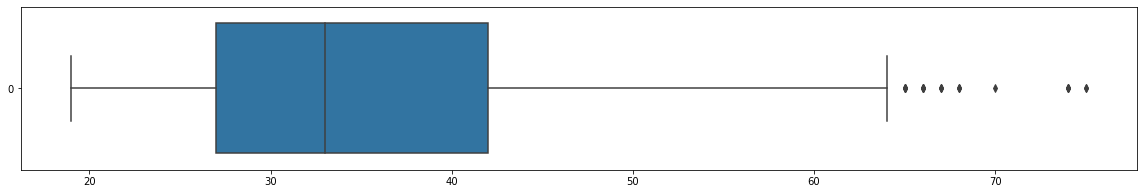

In [33]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(20,3)
sns.boxplot(data=df['age'], orient="h")

#23 outliers very small number ignore it

### Amount

<AxesSubplot:>

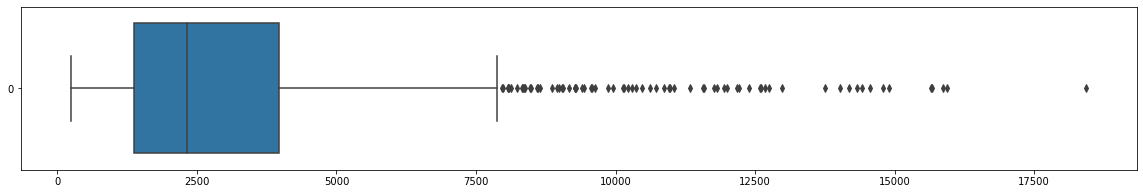

In [34]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(20,3)
sns.boxplot(data=df["amount"], orient="h")

## 72
## Check profile of these outliers for amount

In [35]:
## Seperating Outliers ids for Amount in seperate dataframe.

Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)

amount_out = df.loc[ (df['amount']<  (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR))   , ]
amount_out.shape

(72, 21)

In [36]:
amount_out.groupby('Default').std()

,duration,amount,age
Default,,,
0,11.26,2123.96,9.65
1,12.98,2647.84,11.87


In [37]:
amount_out.value_counts('Default')

Default
1    39
0    33
dtype: int64

In [38]:
## Capping Outliers

Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)
df['amount'] = df['amount'].mask(df['amount']<lr, lr, )
df['amount'] = df['amount'].mask(df['amount']>ur, ur, )

<AxesSubplot:>

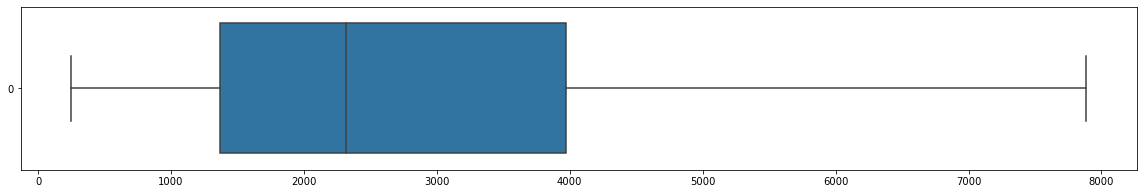

In [39]:
plt.rcParams['figure.figsize']=(20,3)
sns.boxplot(data=df["amount"], orient="h")

## Duration

<AxesSubplot:>

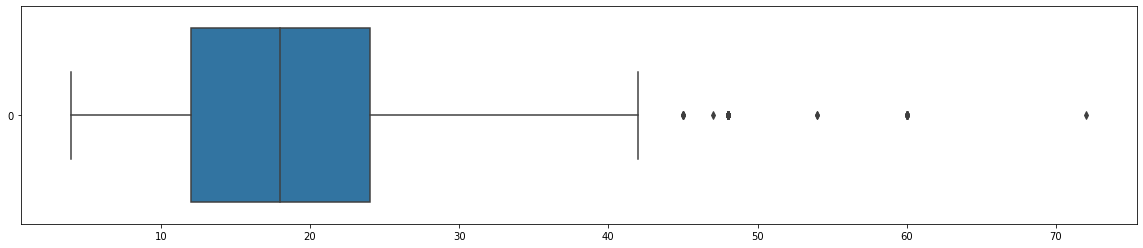

In [40]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(20,4)
sns.boxplot(data=df["duration"], orient="h")
## 70
## Check profile of these outliers for duration

In [41]:
## Seperating Outliers ids for Duration in seperate dataframe.

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)

duration_out = df.loc[ (df['duration']<  (Q1 - 1.5 * IQR)) | (df['duration'] > (Q3 + 1.5 * IQR))   , ]
duration_out.shape

(70, 21)

In [42]:
duration_out.groupby('Default').std()

,duration,amount,age
Default,,,
0,5.28,1711.26,9.35
1,5.79,1754.92,12.70


In [43]:
duration_out.value_counts('Default')

Default
1    40
0    30
dtype: int64

In [44]:
## Capping Outliers

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)
df['duration'] = df['duration'].mask(df['duration']<lr, lr, )
df['duration'] = df['duration'].mask(df['duration']>ur, ur, )

<AxesSubplot:>

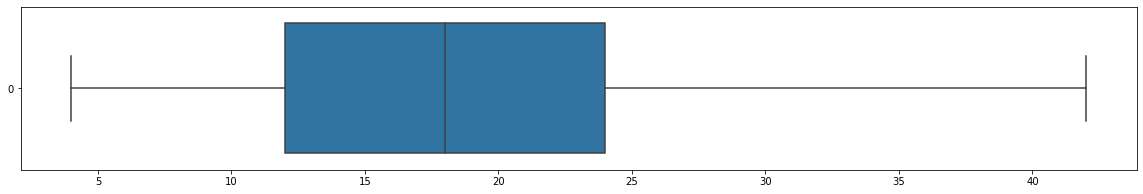

In [45]:
plt.rcParams['figure.figsize']=(20,3)
sns.boxplot(data=df["duration"], orient="h")

## Descriptive Analysis 
## Visualization

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default          1000 non-null   object 
 1   checkingstatus1  1000 non-null   object 
 2   duration         1000 non-null   float64
 3   history          1000 non-null   object 
 4   purpose          1000 non-null   object 
 5   amount           1000 non-null   float64
 6   savings          1000 non-null   object 
 7   employ           1000 non-null   object 
 8   installment      1000 non-null   object 
 9   status           1000 non-null   object 
 10  others           1000 non-null   object 
 11  residence        1000 non-null   object 
 12  property         1000 non-null   object 
 13  age              1000 non-null   int64  
 14  otherplans       1000 non-null   object 
 15  housing          1000 non-null   object 
 16  cards            1000 non-null   object 
 17  job            

In [47]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

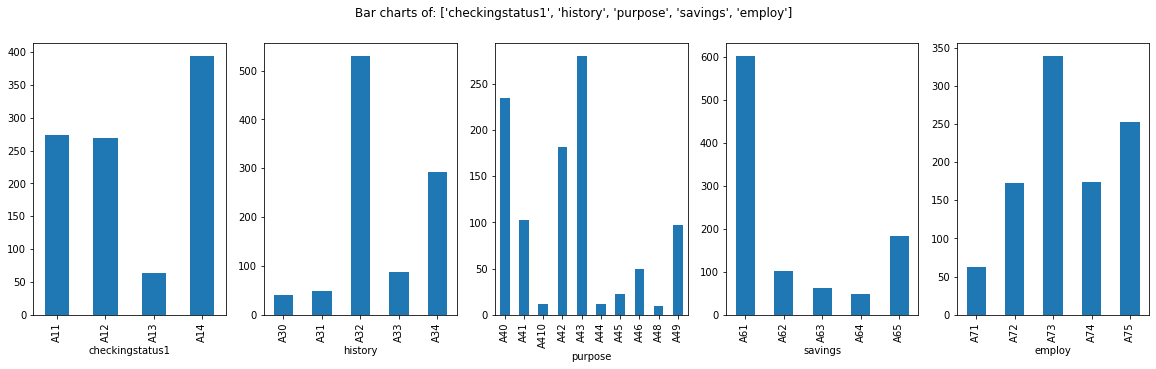

In [48]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['checkingstatus1', 'history', 'purpose','savings','employ'])

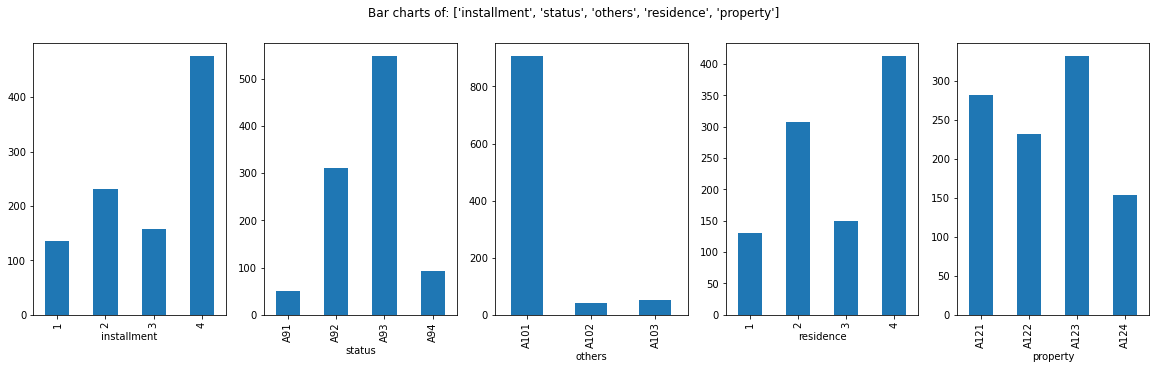

In [49]:
# Calling the function for 5 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['installment', 'status', 'others','residence', 'property'])

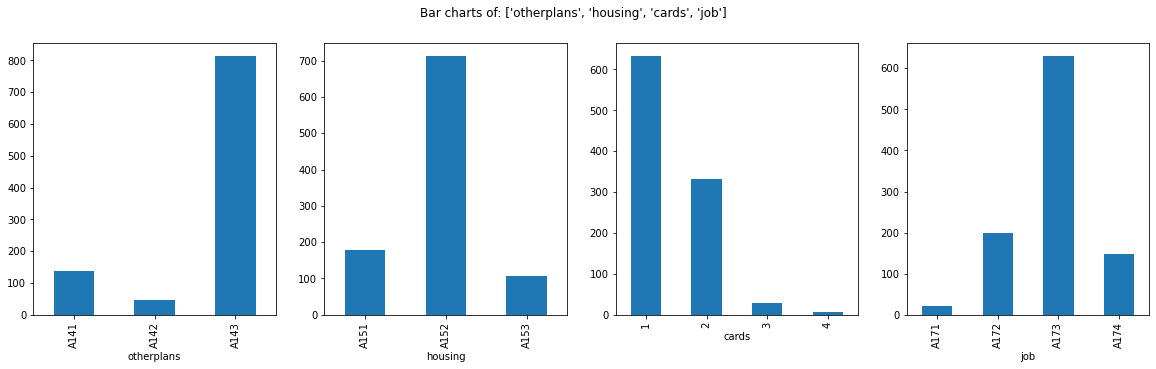

In [50]:
# Calling the function for 4 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['otherplans', 'housing', 'cards', 'job'])

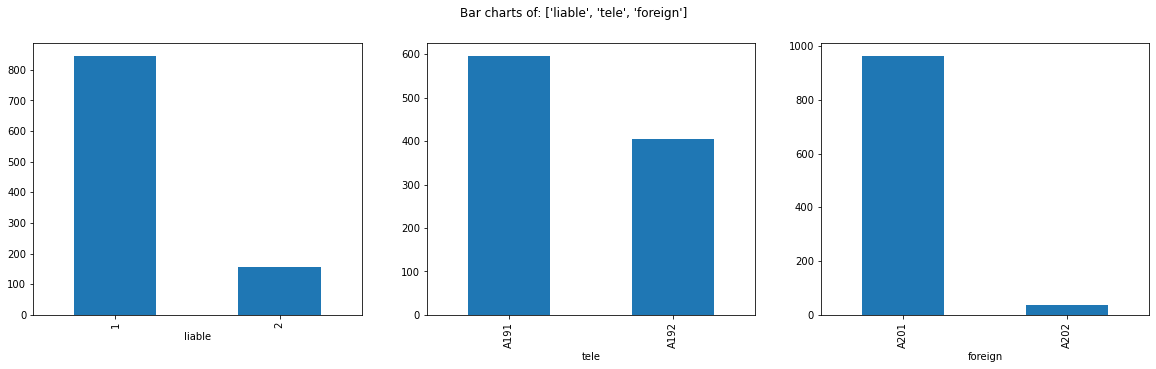

In [51]:
# Calling the function for 3 columns
PlotBarCharts(inpData=df, 
              colsToPlot=['liable', 'tele', 'foreign'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

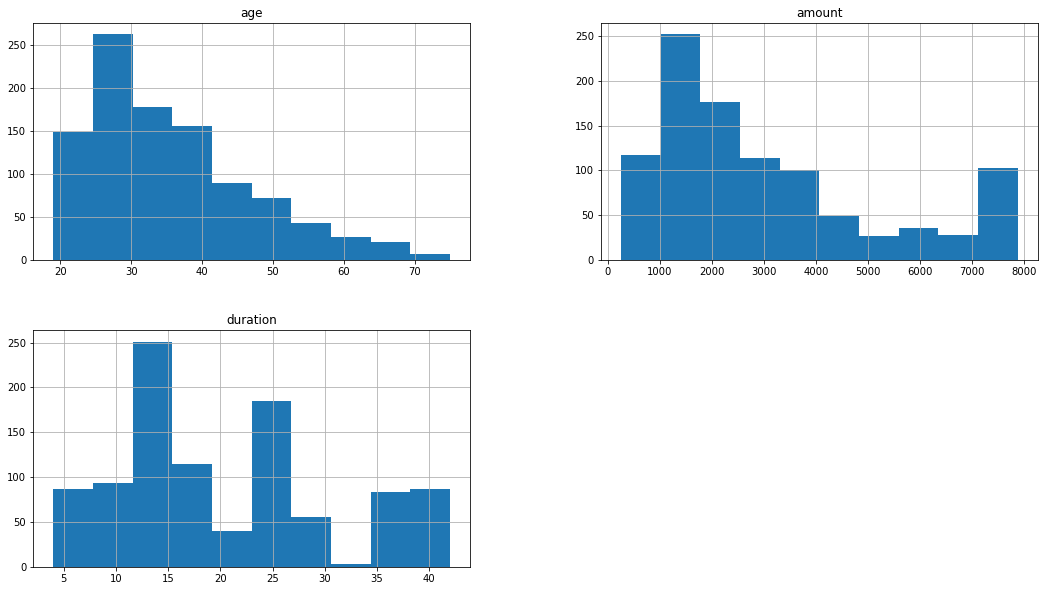

In [52]:
df.hist(['age', 'amount','duration'], figsize=(18,10))

NameError: name 'uhguhghkg' is not defined

In [ ]:
df['Default'].value_counts()

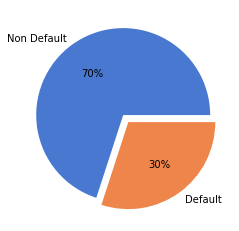

In [54]:
# declaring data
data = [700, 300]
keys = ['Non Default', 'Default']
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('muted')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [ ]:
 #df.groupby(['history','Default']).mean()

### History and Amount

<AxesSubplot:xlabel='history', ylabel='count'>

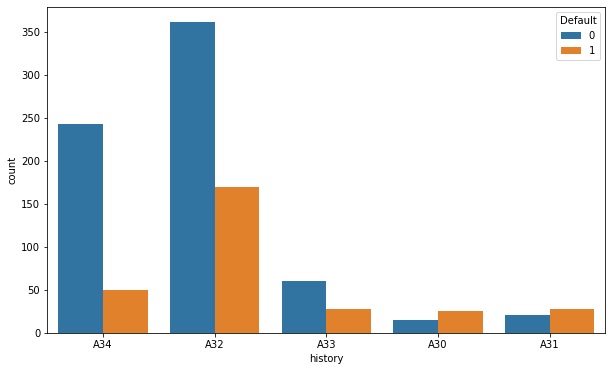

In [58]:
plt.rcParams['figure.figsize']=(10,6)

sns.countplot(data=df, x="history", hue="Default")


### Purpose and Amount

<AxesSubplot:xlabel='purpose', ylabel='count'>

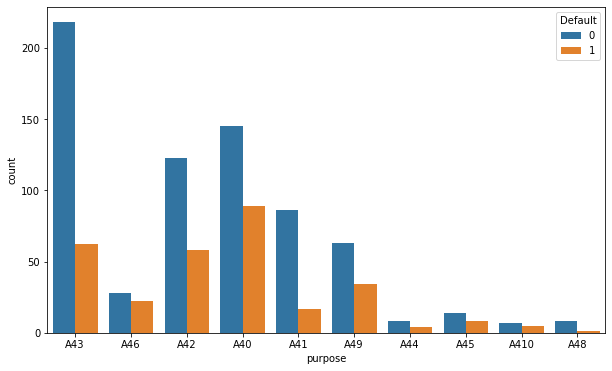

In [59]:
sns.countplot(data=df, x="purpose", hue="Default")


### Status and Amount

<AxesSubplot:xlabel='status', ylabel='count'>

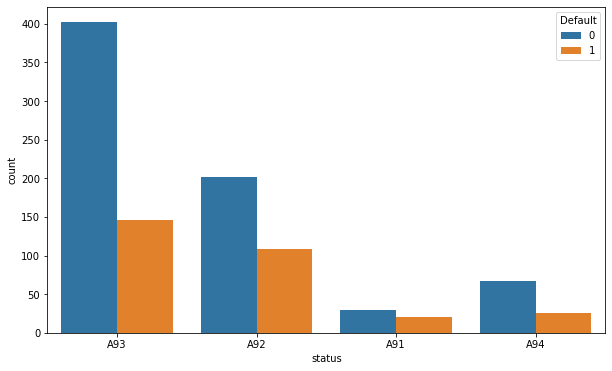

In [60]:
sns.countplot(data=df, x="status", hue="Default")


### Job and Amount

<AxesSubplot:xlabel='status', ylabel='count'>

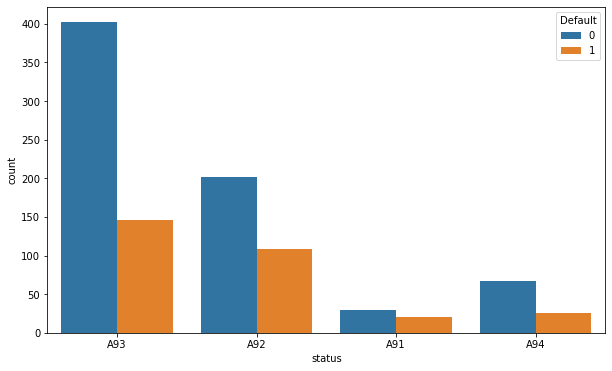

In [61]:
sns.countplot(data=df, x="status", hue="Default")


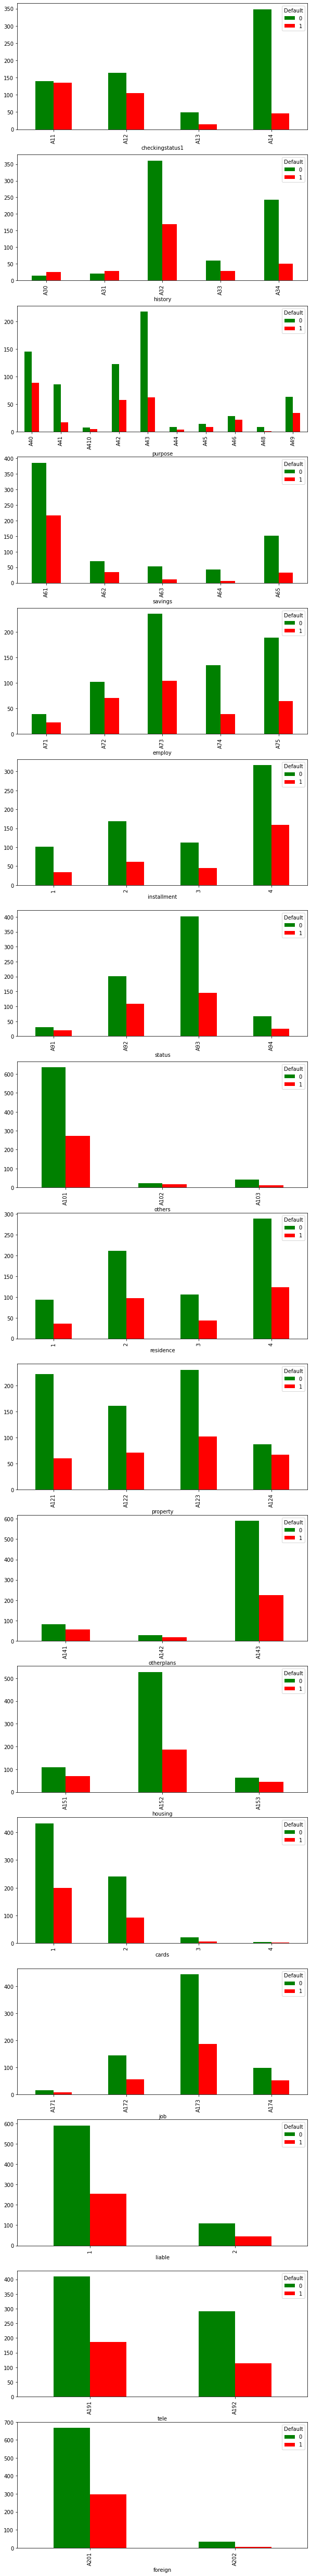

In [66]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['checkingstatus1', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Default'])
    CrossTabResult.plot.bar(color=['green','red'], ax=PlotCanvas[i])

# Dealing Multicolinearity

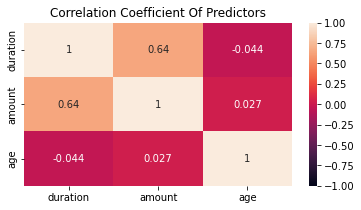

In [67]:
# correlation matrix
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(6,3))

# Generate a mask to onlyshow the bottom triangle
#mask = np.triu(np.ones_like(df_norm.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

## ****ASK HOW INTERPRETATION OF HIGH CORRELATION DONE****

In [68]:

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(considered_features):
    
    v = df[considered_features]
    v['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = v.columns
    vif["VIF"] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]
    vif = vif[vif['Variable']!= 'intercept']
    return vif

## Multicollinearity is handeled with VIF, but not its nature



In [69]:
considered_features = ['duration','amount','age']

In [70]:

compute_vif(considered_features).sort_values('VIF', ascending=False)


,Variable,VIF
0,duration,1.71
1,amount,1.71
2,age,1.01


- No Multicollinearity.

# Normalization

In [72]:
df.describe()

,duration,amount,age
count,1000.00,1000.00,1000.00
mean,20.31,3051.10,35.55
std,10.62,2187.14,11.38
min,4.00,250.00,19.00
25%,12.00,1365.50,27.00
50%,18.00,2319.50,33.00
75%,24.00,3972.25,42.00
max,42.00,7882.38,75.00


In [73]:
df_num = df.loc[:,['duration','amount','age']]

In [74]:
df_num_norm = stats.zscore(df_num)

In [75]:
df_var = df.drop(['duration','amount','age'], axis =1)

In [76]:
df_norm = pd.concat([df_num_norm,df_var], axis = 1)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         1000 non-null   float64
 1   amount           1000 non-null   float64
 2   age              1000 non-null   float64
 3   Default          1000 non-null   object 
 4   checkingstatus1  1000 non-null   object 
 5   history          1000 non-null   object 
 6   purpose          1000 non-null   object 
 7   savings          1000 non-null   object 
 8   employ           1000 non-null   object 
 9   installment      1000 non-null   object 
 10  status           1000 non-null   object 
 11  others           1000 non-null   object 
 12  residence        1000 non-null   object 
 13  property         1000 non-null   object 
 14  otherplans       1000 non-null   object 
 15  housing          1000 non-null   object 
 16  cards            1000 non-null   object 
 17  job            

In [77]:
df_norm.head()

,duration,amount,age,Default,checkingstatus1,history,purpose,savings,employ,installment,status,others,residence,property,otherplans,housing,cards,job,liable,tele,foreign
0,-1.35,-0.86,2.77,0,A11,A34,A43,A65,A75,4,A93,A101,4,A121,A143,A152,2,A173,1,A192,A201
1,2.04,1.33,-1.19,1,A12,A32,A43,A61,A73,2,A92,A101,2,A121,A143,A152,1,A173,1,A191,A201
2,-0.78,-0.44,1.18,0,A14,A34,A46,A61,A74,2,A93,A101,3,A121,A143,A152,1,A172,2,A191,A201
3,2.04,2.21,0.83,0,A11,A32,A42,A61,A74,2,A93,A103,4,A122,A143,A153,1,A173,2,A191,A201
4,0.35,0.83,1.54,1,A11,A33,A40,A61,A73,3,A93,A101,4,A124,A143,A153,2,A173,2,A191,A201


# Dummy Encoding

In [78]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         1000 non-null   float64
 1   amount           1000 non-null   float64
 2   age              1000 non-null   float64
 3   Default          1000 non-null   object 
 4   checkingstatus1  1000 non-null   object 
 5   history          1000 non-null   object 
 6   purpose          1000 non-null   object 
 7   savings          1000 non-null   object 
 8   employ           1000 non-null   object 
 9   installment      1000 non-null   object 
 10  status           1000 non-null   object 
 11  others           1000 non-null   object 
 12  residence        1000 non-null   object 
 13  property         1000 non-null   object 
 14  otherplans       1000 non-null   object 
 15  housing          1000 non-null   object 
 16  cards            1000 non-null   object 
 17  job            

In [79]:
df_num_norm_dumm = df_norm.loc[:,["duration","amount","age"]]


In [80]:
pd.get_dummies(df_norm.drop(df_norm.columns[[0,1,2]], axis=1), drop_first = True) # drop_first=True for n-1 encoding


# # dummy_df = pd.get_dummies(df, prefix={'color':'color', 
#                                       'cut':'cut',
#                                       'clarity':'clarity'},
#                           drop_first=True)

,Default_1,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,history_A31,history_A32,history_A33,history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,...,otherplans_A143,housing_A152,housing_A153,cards_2,cards_3,cards_4,job_A172,job_A173,job_A174,liable_2,tele_A192,foreign_A202
0,0,0,0,0,0,0,0,1,0,0,0,1,...,1,1,0,1,0,0,0,1,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0,0,0
996,0,0,0,0,0,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0,1,0
997,0,0,0,1,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0,0,0
998,1,0,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0,1,0


In [81]:
df_norm = pd.concat([df_num_norm_dumm, pd.get_dummies(df_norm.drop(df_norm.columns[[0,1,2]], axis=1), drop_first = True)] 
                    , axis = 1)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   duration             1000 non-null   float64
 1   amount               1000 non-null   float64
 2   age                  1000 non-null   float64
 3   Default_1            1000 non-null   uint8  
 4   checkingstatus1_A12  1000 non-null   uint8  
 5   checkingstatus1_A13  1000 non-null   uint8  
 6   checkingstatus1_A14  1000 non-null   uint8  
 7   history_A31          1000 non-null   uint8  
 8   history_A32          1000 non-null   uint8  
 9   history_A33          1000 non-null   uint8  
 10  history_A34          1000 non-null   uint8  
 11  purpose_A41          1000 non-null   uint8  
 12  purpose_A410         1000 non-null   uint8  
 13  purpose_A42          1000 non-null   uint8  
 14  purpose_A43          1000 non-null   uint8  
 15  purpose_A44          1000 non-null   ui

In [82]:
df_norm.rename(columns = {'Default_1':'Default'}, inplace = True)

In [ ]:
df_norm.head()

## Logistics Regression

## Using Sckit Learn
### Model 1

In [83]:
y = df_norm.Default
x = df_norm.drop(['Default'], axis =1)

In [84]:
print(x.shape)
print(y.shape)

(1000, 54)
(1000,)


In [85]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 54)
(700,)
(300, 54)
(300,)


In [87]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [88]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[186,  22],
       [ 46,  46]], dtype=int64)

Model accuracy: 0.7733333333333333


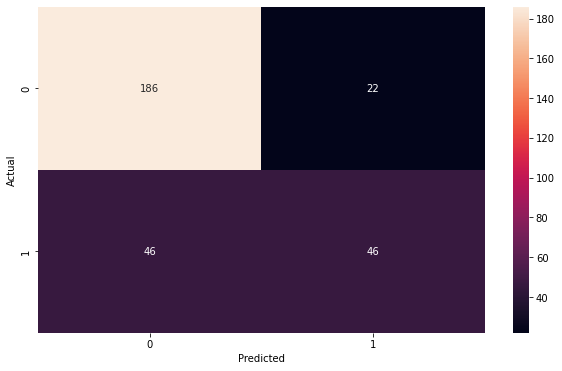

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
s = sns.heatmap(cm ,annot=True ,fmt='d')
s.set(xlabel='Predicted', ylabel='Actual')
print("Model accuracy:",accuracy_score(y_test, y_pred))

In [91]:
from sklearn.metrics import classification_report
target_names = ['not credit default', 'credit default']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

not credit default       0.80      0.89      0.85       208
    credit default       0.68      0.50      0.58        92

          accuracy                           0.77       300
         macro avg       0.74      0.70      0.71       300
      weighted avg       0.76      0.77      0.76       300



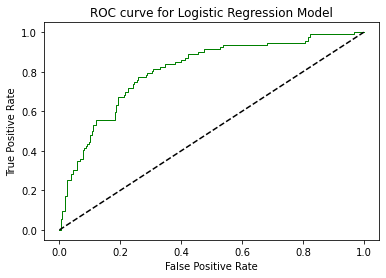

In [96]:
# y_pred_proba = logreg.predict_proba(x_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

y_pred_logreg_proba = logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()


## Model 2

### Logistics Regression

In [97]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, 
                             verbose=1, cv=10, n_jobs=-1)

logModel_grid.fit(x_train, y_train)
print(logModel_grid.best_estimator_)

##Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, 
                   max_iter=20, multi_class='warn', n_jobs=None, penalty='l2', random_state=1234, solver='liblinear', 
                   tol=0.0001, verbose=0, warm_start=False)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')


LogisticRegression(class_weight='balanced', max_iter=20, multi_class='warn',
                   random_state=1234, solver='liblinear')

In [100]:
y_pred = logModel_grid.predict(x_test)
print(y_pred)

[1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1
 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0
 1 0 0 0]


Model accuracy: 0.7366666666666667


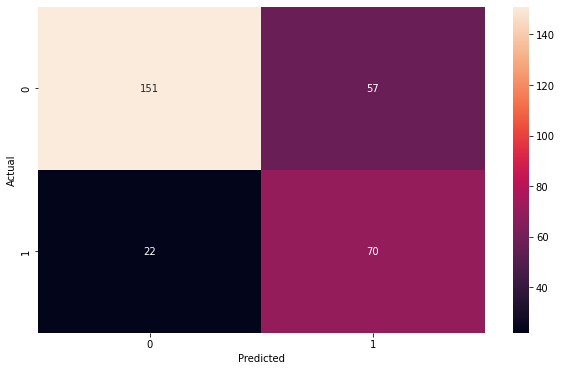

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
s = sns.heatmap(cm ,annot=True ,fmt='d')
s.set(xlabel='Predicted', ylabel='Actual')
print("Model accuracy:",accuracy_score(y_test, y_pred))

## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [105]:
classifier_dt = DecisionTreeClassifier(max_depth=8,random_state=0)
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [107]:
# Get probabilities of records belonging to each class
y_pred_logreg_proba_dt = classifier_dt.predict_proba(x_test)
y_pred_logreg_proba_dt

array([[0.54054054, 0.45945946],
       [0.61111111, 0.38888889],
       [0.61111111, 0.38888889],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [0.54054054, 0.45945946],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.61111111, 0.38888889],
       [0.9047619 , 0.0952381 ],
       [0.61111111, 0.38888889],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.10526316, 0.89473684],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.61111111, 0.38888889],
       [0.

In [109]:
# Get values rather than probabilities
y_pred_logreg_val_dt = classifier_dt.predict(x_test)
y_pred_logreg_val_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], d

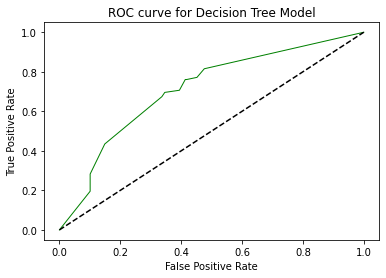

In [110]:
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_logreg_proba_dt[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_dt,tpr_dt,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Decision Tree Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [111]:
pred_proba_dt = y_pred_logreg_proba_dt[:,1]

In [112]:
preds_dt = np.where(pred_proba_dt>0.70, 1, 0)

Model accuracy: 0.71


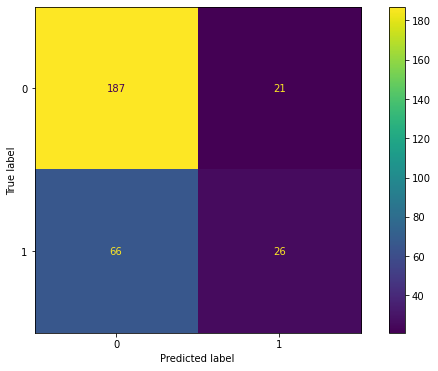

In [113]:
cm_dt = confusion_matrix(y_test, preds_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()
print("Model accuracy:",accuracy_score(y_test, preds_dt))

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
classifier_rf = RandomForestClassifier(n_estimators= 20 ,max_depth=8, random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20, random_state=0)

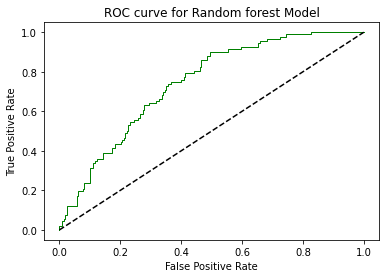

In [118]:
y_pred_logreg_proba_rf = classifier_rf.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_logreg_proba_rf[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_rf,tpr_rf,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random forest Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [119]:
pred_proba_rf = y_pred_logreg_proba_rf[:,1]

In [120]:
preds_rf = np.where(pred_proba_rf>0.70, 1, 0)

Model accuracy: 0.7


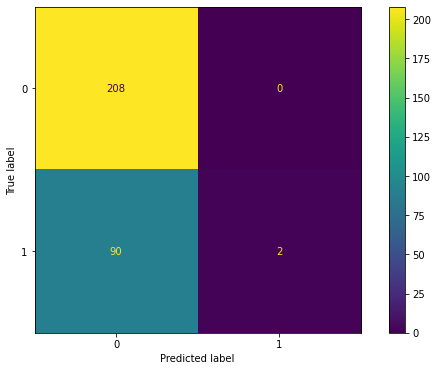

In [121]:
cm_rf = confusion_matrix(y_test, preds_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
print("Model accuracy:",accuracy_score(y_test, preds_rf))

- The best model for German Credit, Default prediction is Logistics Regression with accuracy score of 77.33 %.
- 